In [1]:
import numpy as np, random, operator, pandas as pd 
import matplotlib.pyplot as plt

In [2]:
class City:
    # city is defined by x & y Eucledian coordinates
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [3]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for ii in range(0, len(self.route)):
                fromCity = self.route[ii]
                toCity = None
                if ii + 1 < len(self.route):
                    toCity = self.route[ii + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [4]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [5]:
def initialPopulation(popSize, cityList):
    population = []

    for ii in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [6]:
def rankRoutes(population):
    fitnessResults = {}
    for ii in range(0,len(population)):
        fitnessResults[ii] = Fitness(population[ii]).routeFitness()
    return sorted(fitnessResults.items(),key=operator.itemgetter(1),reverse=True)


In [7]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for ii in range(0, eliteSize):
        selectionResults.append(popRanked[ii][0])
    for ii in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for ii in range(0, len(popRanked)):
            if pick <= df.iat[ii,3]:
                selectionResults.append(popRanked[ii][0])
                break
    return selectionResults

In [8]:
def matingPool(population, selectionResults):
    matingpool = []
    for ii in range(0, len(selectionResults)):
        index = selectionResults[ii]
        matingpool.append(population[index])
    return matingpool

In [9]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for ii in range(startGene, endGene):
        childP1.append(parent1[ii])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

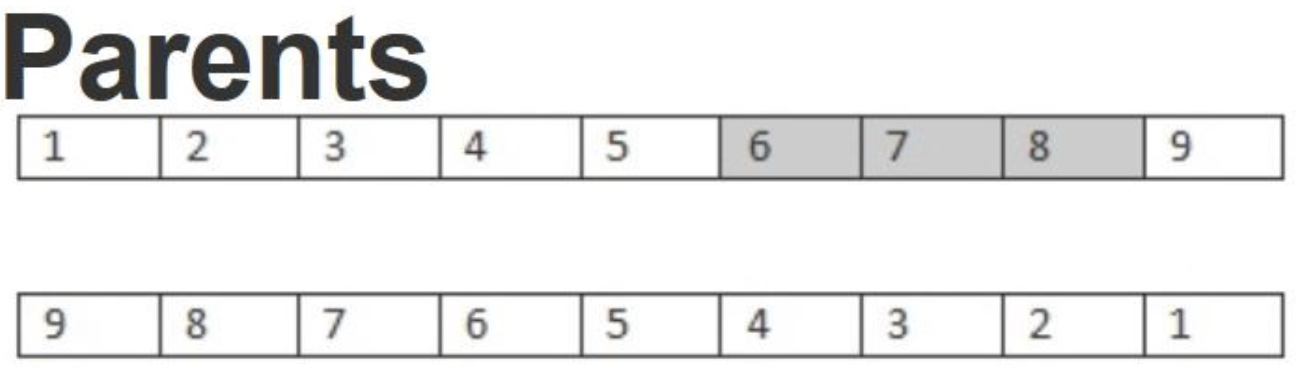


Child
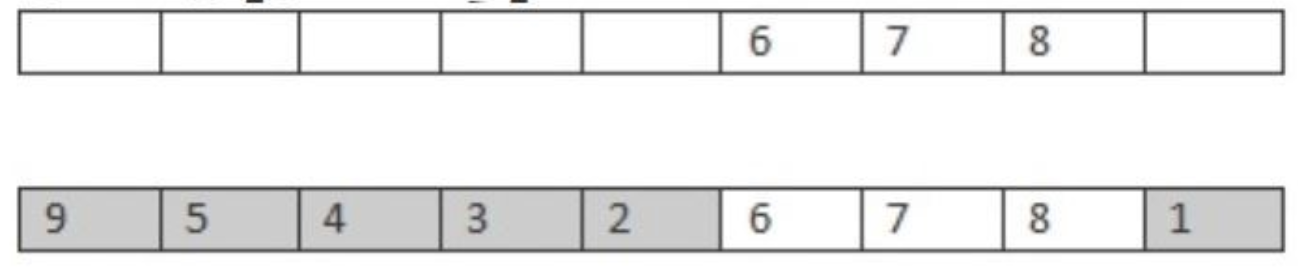
Images from: http://www.theprojectspot.com/tutorial-post/applying-a-genetic-algorithm-to-the-travelling-salesman-problem/5?source=post_page---------------------------

In [10]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for ii in range(0,eliteSize):
        children.append(matingpool[ii])
    
    for ii in range(0, length):
        child = breed(pool[ii], pool[len(matingpool)-ii-1])
        children.append(child)
    return children

In [11]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for ii in range(0,eliteSize):
        children.append(matingpool[ii])
    
    for ii in range(0, length):
        child = breed(pool[ii], pool[len(matingpool)-ii-1])
        children.append(child)
    return children

In [12]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [13]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [14]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [15]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for ii in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [16]:
cityList = []

for ii in range(0,25):
    cityList.append(City(x=int(random.random() * 200), 
                         y=int(random.random() * 200)))

In [17]:
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, 
                 mutationRate=0.01, generations=500)

Initial distance: 1878.3329407149517
Final distance: 890.8221897588882


[(155,196),
 (119,194),
 (95,164),
 (4,180),
 (39,95),
 (5,45),
 (33,48),
 (71,48),
 (90,25),
 (99,72),
 (105,128),
 (119,96),
 (115,88),
 (151,17),
 (177,24),
 (180,54),
 (169,98),
 (172,104),
 (177,103),
 (183,115),
 (167,118),
 (173,122),
 (176,132),
 (187,167),
 (175,194)]

In [18]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    
    
    
    # return last genertion & its Distance
    return pop, progress

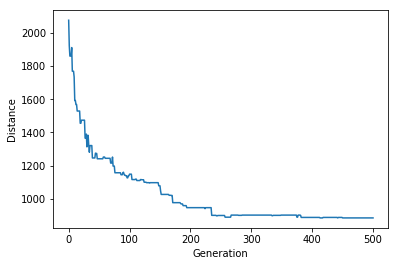

([[(119,96),
   (151,17),
   (177,24),
   (180,54),
   (169,98),
   (172,104),
   (177,103),
   (183,115),
   (167,118),
   (173,122),
   (176,132),
   (187,167),
   (175,194),
   (155,196),
   (119,194),
   (95,164),
   (105,128),
   (4,180),
   (39,95),
   (5,45),
   (33,48),
   (71,48),
   (90,25),
   (99,72),
   (115,88)],
  [(119,194),
   (95,164),
   (105,128),
   (4,180),
   (39,95),
   (5,45),
   (33,48),
   (71,48),
   (90,25),
   (99,72),
   (115,88),
   (119,96),
   (151,17),
   (177,24),
   (180,54),
   (169,98),
   (172,104),
   (177,103),
   (183,115),
   (167,118),
   (173,122),
   (176,132),
   (187,167),
   (175,194),
   (155,196)],
  [(187,167),
   (175,194),
   (155,196),
   (119,194),
   (95,164),
   (105,128),
   (4,180),
   (39,95),
   (5,45),
   (33,48),
   (71,48),
   (90,25),
   (99,72),
   (115,88),
   (119,96),
   (151,17),
   (177,24),
   (180,54),
   (169,98),
   (172,104),
   (177,103),
   (183,115),
   (167,118),
   (173,122),
   (176,132)],
  [(119,194),

In [19]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, 
                     mutationRate=0.01, generations=500)

In [20]:
# create the same list/map of cities as in Lee Jacobson's blog 
# cited above for images
cityList2 = []

cityList2.append(City(x=60,  y=200))
cityList2.append(City(x=180, y=200))
cityList2.append(City(x=80,  y=180))
cityList2.append(City(x=140, y=180))
cityList2.append(City(x=20,  y=160))
cityList2.append(City(x=100, y=160))
cityList2.append(City(x=200, y=160))
cityList2.append(City(x=140, y=140))
cityList2.append(City(x=40,  y=120))
cityList2.append(City(x=100, y=120))
cityList2.append(City(x=180, y=100))
cityList2.append(City(x=60,  y=80))
cityList2.append(City(x=120, y=80))
cityList2.append(City(x=180, y=60))
cityList2.append(City(x=20,  y=40))
cityList2.append(City(x=100, y=40))
cityList2.append(City(x=200, y=40))
cityList2.append(City(x=20,  y=20))
cityList2.append(City(x=60,  y=20))
cityList2.append(City(x=160, y=20))
    

In [21]:
cityList2 

[(60,200),
 (180,200),
 (80,180),
 (140,180),
 (20,160),
 (100,160),
 (200,160),
 (140,140),
 (40,120),
 (100,120),
 (180,100),
 (60,80),
 (120,80),
 (180,60),
 (20,40),
 (100,40),
 (200,40),
 (20,20),
 (60,20),
 (160,20)]

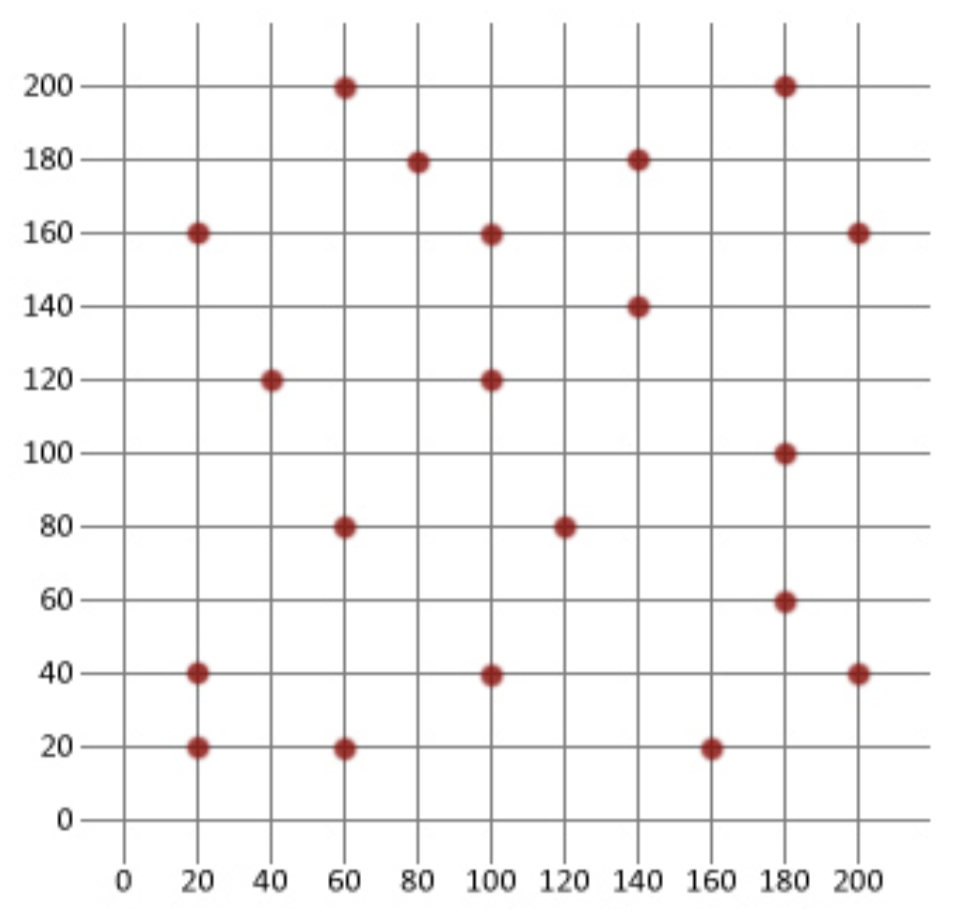


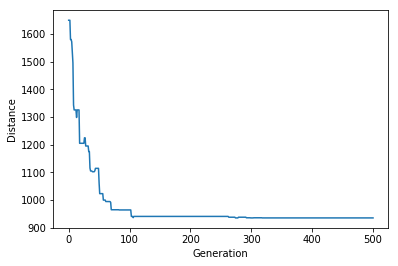

In [22]:
lastPop2, distances = geneticAlgorithmPlot(population=cityList2, popSize=100, eliteSize=20, 
                     mutationRate=0.01, generations=500)

Optmal result from Lee Jacobson
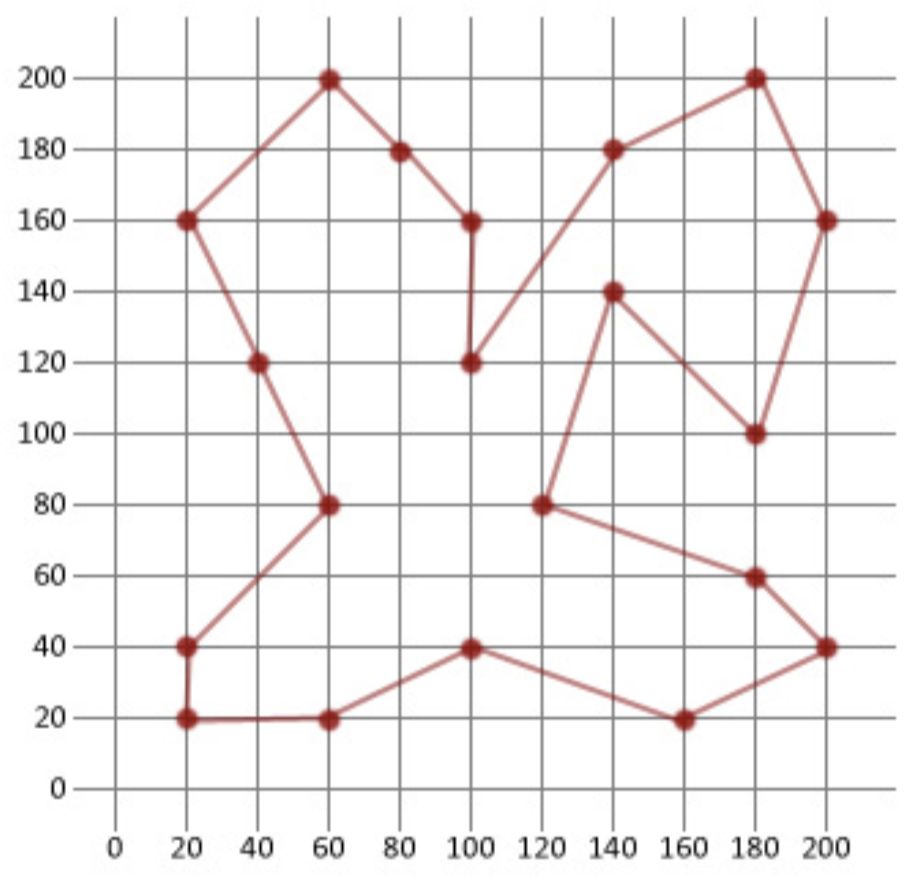

In [24]:
# select the best route, will need to plot 
def bestRoute_yuliya(population):
    # create an aray to store population fitness values
    # one value for each agent in the population
    ll = len(population)
    fitnessResults = np.zeros(ll)
    for ii in range(0,ll):
        fitnessResults[ii] = Fitness(population[ii]).routeFitness()
        
    ppos_bestfit = fitnessResults.argmax()
    bestR = population[ppos_bestfit] # best population
    bestFit = fitnessResults[ppos_bestfit] # best population's fitness
    return bestR, bestFit


def bestRoute_robin(population):
    # create an aray to store population fitness values
    # one value for each agent in the population
    routesRanked = rankRoutes(population)
    indexOfBestRoute = routesRanked[0][0]
    bestRoute = population[indexOfBestRoute]
    bestFit = routesRanked[0][1]
    return bestRoute, bestFit


def bestRoute_daniel(population):
    # create an aray to store population fitness values
    # one value for each agent in the population
    sortedVals = rankRoutes(population)
    optimal = Fitness(population[sortedVals[0][0]])
    optimalfit = optimal.routeFitness()
    return population[sortedVals[0][0]], optimalfit
    #return bestR, bestFit

In [25]:
print(distances[0])
print(distances[len(distances)-1])

1649.3853596072247
934.7895527107987


In [26]:
# get the best route in the population after 500 iterations
bestRoute1, bestFit1 = bestRoute_yuliya(lastPop2)
print(bestRoute1)
print(bestFit1)

bestRoute1, bestFit1 = bestRoute_robin(lastPop2)
print(bestRoute1)
print(bestFit1)

bestRoute1, bestFit1 = bestRoute_daniel(lastPop2)
print(bestRoute1)
print(bestFit1) # all three functions produce the same output! 

[(100,120), (120,80), (60,80), (20,40), (20,20), (60,20), (100,40), (160,20), (200,40), (180,60), (180,100), (200,160), (180,200), (140,180), (140,140), (40,120), (20,160), (60,200), (80,180), (100,160)]
0.0010697594951720388
[(100,120), (120,80), (60,80), (20,40), (20,20), (60,20), (100,40), (160,20), (200,40), (180,60), (180,100), (200,160), (180,200), (140,180), (140,140), (40,120), (20,160), (60,200), (80,180), (100,160)]
0.0010697594951720388
[(100,120), (120,80), (60,80), (20,40), (20,20), (60,20), (100,40), (160,20), (200,40), (180,60), (180,100), (200,160), (180,200), (140,180), (140,140), (40,120), (20,160), (60,200), (80,180), (100,160)]
0.0010697594951720388


In [31]:
# plot cities and best route, specific to set up within 200 x 200 grid
def plotTSRoute_yuliya(route):
    ll = len(route)
    print(ll)
    fig = plt.figure()

    ax = fig.gca()
    ax.set_xticks(np.arange(0, 20, 200))
    ax.set_yticks(np.arange(0, 20, 200))
    # get x & y coordinates for the cities
    xx=np.zeros(ll)
    yy=np.zeros(ll)
    for ii in range(0,ll):
        xx[ii] = route[ii].x 
        yy[ii] = route[ii].y 
    
    plt.scatter(xx, yy)
    # connect dots by lines
    plt.plot(xx, yy)
    
    #plt.xticks(np.arange(0, 20, 200))
    #plt.yticks(np.arange(0, 20, 200))
    plt.grid()
    plt.show()
    

def plotTSRoute_asaf(route):
    fig = plt.figure(1)

    # Connect the first city to the last city, to complete plot
    routeCircular = route + [route[0]] # nicely done!!
  
    plt.plot([city.x for city in routeCircular], [city.y for city in routeCircular], 'ro-')
  
    plt.grid()
    plt.show()   

# Q: should we plot the start/end city in different color? 

Starting population distance  1649.3853596072247
Converged population distance  934.7895527107987
[(100,120), (120,80), (60,80), (20,40), (20,20), (60,20), (100,40), (160,20), (200,40), (180,60), (180,100), (200,160), (180,200), (140,180), (140,140), (40,120), (20,160), (60,200), (80,180), (100,160)]
20


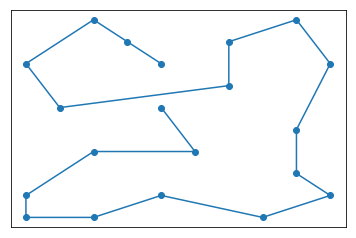

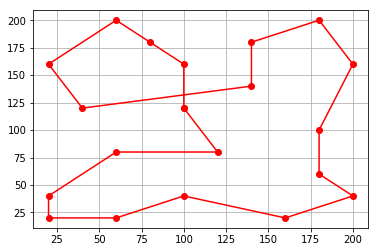

In [32]:
print('Starting population distance ', distances[0])
print('Converged population distance ', distances[len(distances)-1])
print(bestRoute1)
plotTSRoute_yuliya(bestRoute1) # stil no grid... :(
plotTSRoute_asaf(bestRoute1) # the grid!!!! 